<a href="https://colab.research.google.com/github/Jayalakshmibadiginchala/Student-Performance-Prediction/blob/main/Student_performance_prediction_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors (1).csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# data preproceesing s1
# finding the missing value and replace the mode value
df.Teacher_Quality.value_counts()


,count
Teacher_Quality,
Medium,3925
High,1947
Low,657


In [ ]:
df.loc[df['Teacher_Quality'].isnull(),'Teacher_Quality']='Medium'
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.Parental_Education_Level.value_counts()


,count
Parental_Education_Level,
High School,3223
College,1989
Postgraduate,1305


In [ ]:
df.loc[df['Parental_Education_Level'].isnull(),'Parental_Education_Level']='High School'
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.Distance_from_Home.value_counts()

,count
Distance_from_Home,
Near,3884
Moderate,1998
Far,658


In [ ]:
df.loc[df['Distance_from_Home'].isnull(),'Distance_from_Home']='Near'
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# seperate the numeric column
col = df.select_dtypes(include=['int','float']).columns
col

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

<Axes: xlabel='Hours_Studied'>

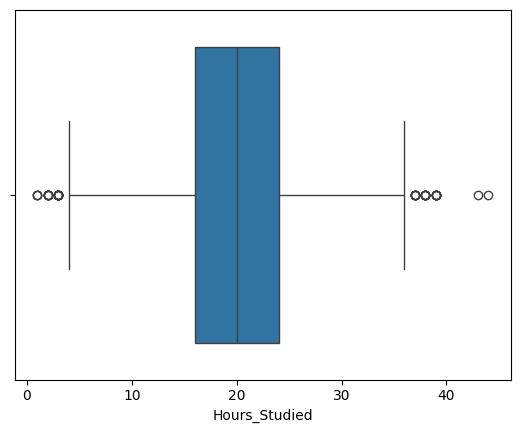

In [ ]:
# numeric data of outlier
sns.boxplot(x='Hours_Studied',data=df)

<Axes: xlabel='Attendance'>

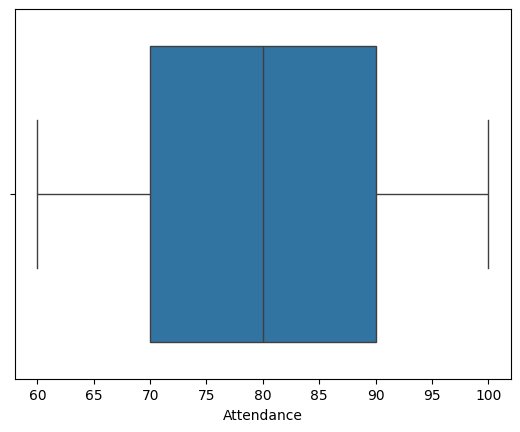

In [ ]:
sns.boxplot(x='Attendance',data=df)

<Axes: xlabel='Sleep_Hours'>

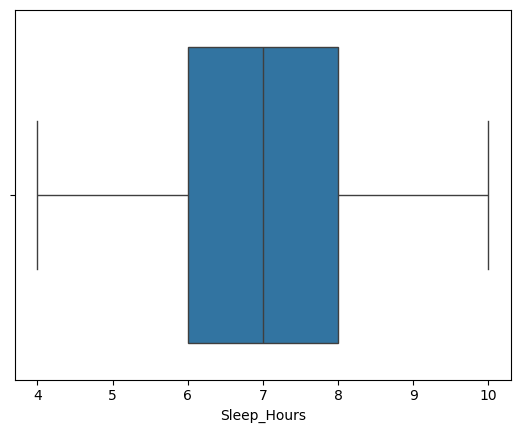

In [ ]:
sns.boxplot(x='Sleep_Hours',data=df)

<Axes: xlabel='Previous_Scores'>

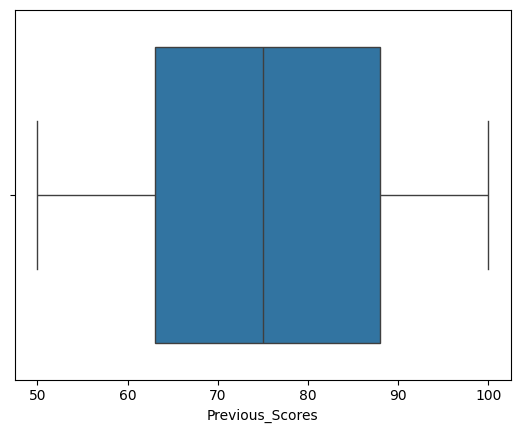

In [ ]:
sns.boxplot(x='Previous_Scores',data=df)

In [ ]:
#seperate the categorical columns

col1 = df.select_dtypes(include=['object']).columns
col1

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [ ]:
for col in col1:
    df[col] = pd.Categorical(df[col])

In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
# Lecoder using for categorical data change numerical data
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

for i in col1:
    df[i] = le.fit_transform(df[i])


In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0,68
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0,69
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0,68
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0,68


In [ ]:
X = df[df.columns[:-1]]
Y = df.Exam_Score

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled

array([[ 0.50494151,  0.34837541, -0.25424875, ...,  0.14822148,
         0.74840713,  0.85574648],
       [-0.16282241, -1.38373605, -0.25424875, ..., -1.28350266,
        -0.74366466, -1.16857039],
       [ 0.67188249,  1.56085343,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648],
       ...,
       [ 0.00411857,  0.86800885,  0.90106177, ...,  1.57994561,
         0.74840713, -1.16857039],
       [-1.66529123,  0.52158655, -1.40955928, ...,  0.14822148,
        -2.23573644, -1.16857039],
       [-0.83058633, -1.12391933,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648]])

In [ ]:
x_data = pd.DataFrame(X_scaled,columns=X.columns)
x_data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,0.504942,0.348375,-0.254249,-1.380517,-1.214685,-0.019796,-0.143800,-0.393061,0.285825,-1.213934,-0.284883,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,0.748407,0.855746
1,-0.162822,-1.383736,-0.254249,0.913804,-1.214685,0.661399,-1.116110,-0.393061,0.285825,0.411451,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,-1.283503,-0.743665,-1.168570
2,0.671882,1.560853,0.901062,0.913804,0.823259,-0.019796,1.106313,0.884966,0.285825,0.411451,1.062448,0.768332,0.661006,-0.252518,1.001199,-0.342867,1.579946,0.748407,0.855746
3,1.506587,0.781403,-0.254249,0.913804,0.823259,0.661399,1.592469,0.884966,0.285825,-0.401242,1.062448,0.768332,0.661006,-1.575587,1.001199,-0.342867,0.148221,-0.743665,0.855746
4,-0.162822,1.041220,0.901062,0.913804,0.823259,-0.700990,-0.699406,0.884966,0.285825,1.224144,1.062448,-1.462550,0.661006,-0.252518,1.001199,-0.342867,-1.283503,0.748407,-1.168570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,-1.409559,0.913804,-1.214685,-0.019796,0.064552,0.884966,0.285825,-0.401242,-1.632214,0.768332,0.661006,1.070550,-0.938377,-0.342867,0.148221,0.748407,-1.168570
6603,0.504942,-0.344469,-1.409559,0.913804,-1.214685,0.661399,0.411806,0.884966,0.285825,1.224144,-0.284883,-1.462550,0.661006,1.070550,-0.938377,-0.342867,0.148221,0.748407,-1.168570
6604,0.004119,0.868009,0.901062,-0.233356,0.823259,-0.700990,-0.699406,-0.393061,0.285825,1.224144,-0.284883,0.768332,0.661006,-1.575587,-0.938377,-0.342867,1.579946,0.748407,-1.168570
6605,-1.665291,0.521587,-1.409559,-1.380517,0.823259,-0.700990,1.106313,-1.671088,0.285825,0.411451,-0.284883,0.768332,-1.512845,1.070550,0.031411,-0.342867,0.148221,-2.235736,-1.168570


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
Y

,Exam_Score
0,67
1,61
2,74
3,71
4,70
...,...
6602,68
6603,69
6604,68
6605,68


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,Y, train_size=0.75,random_state = 42)

In [ ]:
x_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
1020,0.504942,-1.210525,0.901062,-1.380517,-1.214685,-0.700990,0.550707,0.884966,0.285825,-1.213934,-1.632214,0.768332,0.661006,1.070550,-0.938377,-0.342867,0.148221,0.748407,-1.168570
5244,1.005764,0.521587,-0.254249,-0.233356,-1.214685,0.661399,-0.699406,-0.393061,0.285825,-1.213934,-0.284883,-1.462550,0.661006,-0.252518,1.001199,-0.342867,0.148221,0.748407,-1.168570
6153,-0.830586,-0.777497,-1.409559,-0.233356,-1.214685,-0.700990,-0.491054,-0.393061,-3.498640,2.849529,-0.284883,0.768332,0.661006,1.070550,1.001199,-0.342867,-1.283503,0.748407,-1.168570
2805,-1.832232,-0.777497,-0.254249,-1.380517,0.823259,-0.019796,0.967412,0.884966,0.285825,-1.213934,-0.284883,0.768332,0.661006,-1.575587,-0.938377,-0.342867,0.148221,0.748407,0.855746
737,1.005764,0.348375,-0.254249,-1.380517,-1.214685,-2.063380,-0.907758,0.884966,-3.498640,1.224144,-1.632214,-1.462550,0.661006,1.070550,-0.938377,-0.342867,0.148221,0.748407,0.855746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.830586,0.175164,0.901062,0.913804,0.823259,-0.019796,1.245215,0.884966,0.285825,1.224144,-0.284883,-1.462550,0.661006,-1.575587,-0.938377,-0.342867,0.148221,-0.743665,-1.168570
5191,0.004119,-1.297130,0.901062,0.913804,0.823259,0.661399,1.523018,-1.671088,0.285825,-1.213934,-0.284883,0.768332,0.661006,-1.575587,0.031411,-0.342867,-1.283503,0.748407,-1.168570
5226,-0.496704,-1.383736,-1.409559,-0.233356,0.823259,2.023788,-0.838307,0.884966,0.285825,-1.213934,-1.632214,0.768332,0.661006,1.070550,0.031411,-0.342867,0.148221,-0.743665,-1.168570
5390,-0.663645,1.734065,-1.409559,-1.380517,0.823259,-0.019796,0.481257,0.884966,0.285825,0.411451,-1.632214,0.768332,0.661006,1.070550,-0.938377,-0.342867,0.148221,0.748407,0.855746


In [ ]:
l_model = LinearRegression()

In [ ]:
l_model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_pred = l_model.predict(x_test)
y_pred

array([65.20355785, 67.46316071, 69.82432257, ..., 63.19118758,
       69.76697908, 70.93437182])

In [ ]:
from sklearn.metrics import *
score =r2_score(y_test,y_pred)
score

0.7014364547277983

In [ ]:
import math
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 4.066584108480179
MAE: 1.0083566918959588
RMSE: 2.016577325192411


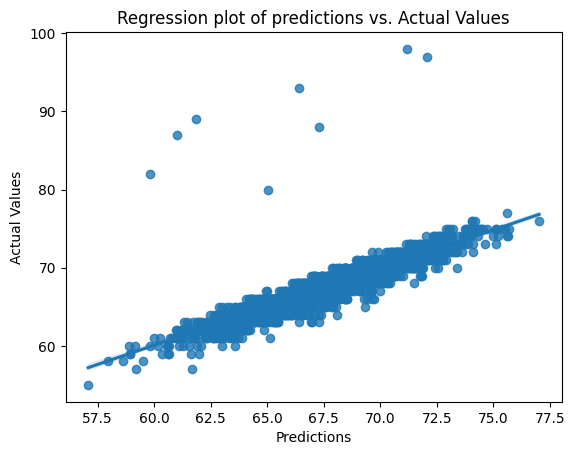

In [ ]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Regression plot of predictions vs. Actual Values")
plt.show()


In [ ]:
# code to print the accuracy

print("R^2 score:", score)


R^2 score: 0.7014364547277983
